In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
feat = pd.read_pickle('features.pkl')
feat.columns
#feat.info()

Index(['FIPS', 'CountyName', 'perc_in_labor_frc', 'perc_in_armfrc',
       'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt', 'perc_occ_svc',
       'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste',
       'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens', 'ln_housedens',
       'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh', 'avg_hh_size',
       'fert_age15_19', 'fert_age20_34', 'fert_age35_50', 'p_highsch',
       'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864', 'p_civdis_65',
       'p_samehouse', 'p_diffhousUS', 'p_abroad1yr', 'p_nativeUS',
       'p_nativestate', 'p_nat_citz', 'p_spk_engl', 'PercBelowPov', 'pov_bins',
       'pov_bin'],
      dtype='object')

In [3]:
X = feat[['perc_in_labor_frc',
      'perc_in_armfrc', 'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt',
       'perc_occ_svc', 'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE',
       'p_ind_waste', 'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens',
       'ln_housedens', 'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 'fert_age20_34', 'fert_age35_50',
       'p_highsch', 'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864',
       'p_civdis_65', 'p_samehouse', 'p_diffhousUS', 'p_abroad1yr',
       'p_nativeUS', 'p_nativestate', 'p_nat_citz', 'p_spk_engl']]
X = sm.add_constant(X)
X = X.fillna(0)

In [4]:
X.cov()

,const,perc_in_labor_frc,perc_in_armfrc,p_com_carpool,p_com_workhome,perc_occ_mgt,perc_occ_svc,p_ind_whlesl,p_ind_info,p_ind_FIRE,...,p_civdis_18,p_civdis_1864,p_civdis_65,p_samehouse,p_diffhousUS,p_abroad1yr,p_nativeUS,p_nativestate,p_nat_citz,p_spk_engl
const,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perc_in_labor_frc,0.0,60.424724,1.603291,-3.112889,5.167366,22.010866,-10.356312,1.952674,1.387007,5.042035,...,-4.964027,-25.988332,-27.586024,-4.579104,3.921219,0.654814,-12.522227,-22.852513,8.326683,-11.824088
perc_in_armfrc,0.0,1.603291,2.281451,-0.056689,0.514165,0.457639,0.387606,-0.092770,0.019576,0.055577,...,0.026981,-0.199349,0.467520,-2.103718,1.777507,0.326631,-0.978318,-4.862006,1.203458,-0.735515
p_com_carpool,0.0,-3.112889,-0.056689,8.315013,-0.993153,-5.661335,1.023280,-0.316160,-0.362576,-1.113267,...,0.653867,3.041614,5.239342,-1.237963,1.238868,-0.000846,-1.421254,-1.369983,-7.424558,-6.346094
p_com_workhome,0.0,5.167366,0.514165,-0.993153,10.463528,8.277389,-1.173306,-0.132222,0.197319,0.006534,...,-1.433018,-4.402206,-5.608741,0.705389,-0.827877,0.124644,0.436353,-8.275092,4.599482,-0.031220
perc_occ_mgt,0.0,22.010866,0.457639,-5.661335,8.277389,41.316104,-6.023780,0.264990,1.951233,5.206586,...,-3.751276,-15.456954,-20.516936,-3.723141,2.984128,0.736896,-7.989573,-26.801815,15.886933,-3.070279
perc_occ_svc,0.0,-10.356312,0.387606,1.023280,-1.173306,-6.023780,12.756581,-1.128706,-0.294921,-0.912564,...,0.931836,4.204148,5.089865,-3.170051,3.052693,0.118394,-1.146524,-4.038177,-1.554220,-5.775172
p_ind_whlesl,0.0,1.952674,-0.092770,-0.316160,-0.132222,0.264990,-1.128706,1.386798,0.075013,0.376298,...,-0.147397,-1.041751,-1.319180,0.369539,-0.335448,-0.034588,-0.382194,1.564983,-0.619885,-0.027019
p_ind_info,0.0,1.387007,0.019576,-0.362576,0.197319,1.951233,-0.294921,0.075013,0.681300,0.459860,...,-0.156292,-0.863332,-1.332450,-0.268584,0.219925,0.048394,-0.927073,-2.495526,1.755282,-0.378518
p_ind_FIRE,0.0,5.042035,0.055577,-1.113267,0.006534,5.206586,-0.912564,0.376298,0.459860,3.688253,...,-0.629650,-2.976292,-4.633411,-0.460443,0.363546,0.097461,-2.607459,-4.983891,4.257966,-1.270242


In [5]:

y = feat['PercBelowPov']/100
y = feat['pov_bin']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
print(y_train.dtype,len(y_train))
X_train.info()

int64 2199
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 803 to 860
Data columns (total 36 columns):
const                2199 non-null int64
perc_in_labor_frc    2199 non-null float64
perc_in_armfrc       2199 non-null float64
p_com_carpool        2199 non-null float64
p_com_workhome       2199 non-null float64
perc_occ_mgt         2199 non-null float64
perc_occ_svc         2199 non-null float64
p_ind_whlesl         2199 non-null float64
p_ind_info           2199 non-null float64
p_ind_FIRE           2199 non-null float64
p_ind_waste          2199 non-null float64
p_ind_edsvc          2199 non-null float64
p_ind_pubadm         2199 non-null float64
ln_popdens           2199 non-null float64
ln_housedens         2199 non-null float64
p_nonfamily          2199 non-null float64
p_marrfam            2199 non-null float64
p_malehh             2199 non-null float64
p_femhh              2199 non-null float64
avg_hh_size          2199 non-null float64
fert_age15_19        21

In [7]:
feat['p_com_workhome'].describe()

count    3142.000000
mean        4.739720
std         3.234738
min         0.000000
25%         2.800000
50%         4.000000
75%         5.800000
max        35.500000
Name: p_com_workhome, dtype: float64

In [8]:
from statsmodels.discrete import discrete_model

In [9]:
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

Optimization terminated successfully.
         Current function value: 0.331886
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                pov_bin   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2163
Method:                           MLE   Df Model:                           35
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                  0.5210
Time:                        12:51:50   Log-Likelihood:                -729.82
converged:                       True   LL-Null:                       -1523.7
                                        LLR p-value:                1.354e-311
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                -9.1747    139.790     -0.066      0.948      -283.158   264.808
perc_in_

In [10]:
test_pred = t_log.predict(X_test)

In [11]:
sm.fit_regularized?

Object `sm.fit_regularized` not found.


In [12]:
sm.Logit(y_train,X_train).fit_regularized

<bound method BinaryModel.fit_regularized of <statsmodels.discrete.discrete_model.Logit object at 0x7f56bd00bac8>>

In [13]:
t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=10000, 
                                                  qc_verbose=True, trim_mode='size',
                                                 size_trim_tol =0.1)
print (t_reg.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.332205264771
            Iterations: 251
            Function evaluations: 275
            Gradient evaluations: 251
QC check did not pass for 14 out of 36 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
------ Recall the problem was rescaled by 1 / nobs ---
|passed    |alpha     |fprime    |param     |
--------------------------------------------
|True      |4.548e-05 |-1.487e-06|1.917e-17 |
|True      |4.548e-05 |2.712e-05 |-1.374e-01|
|True      |4.548e-05 |4.609e-05 |-9.617e-02|
|False     |4.548e-05 |-4.803e-05|4.464e-03 |
|False     |4.548e-05 |-4.854e-05|1.224e-01 |
|True      |4.548e-05 |3.631e-05 |-5.012e-02|
|False     |4.548e-05 |-5.089e-05|6.883e-03 |
|True      |4.548e-05 |4.447e-05 |-7.132e-02|
|True      |4.548e-05 |4.542e-05 |-1.358e-01|
|True      |4.548e-05 |4.411e-05 |-3.620e-02|
|True      |4.548e-05 |-4.647e-05|3.664e-0

In [23]:
pred = t_reg.predict(X_test)


In [34]:
s_pred = pd.Series(pred)
y_test
df = pd.concat([s_pred, y_test], axis=1)
df.describe()

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0,pov_bin
count,9.430000e+02,943.000000
mean,2.039727e-02,0.523860
std,1.014705e-01,0.499695
min,3.451104e-07,0.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,9.554507e-01,1.000000


In [40]:
re_y_test = y_test.copy()

In [52]:
re_y_test.index = list(range(943))
re_y_test
s_pred
df = pd.concat([s_pred, re_y_test], axis=1)
df.columns = ['predicted','test_actual']
df.columns

act0 = df[df['test_actual'] == 0]
act0.describe()

act1 = df[df['test_actual'] == 1]
act1.describe()

,predicted,test_actual
count,494.000000,494.0
mean,0.035171,1.0
std,0.127086,0.0
min,0.000004,1.0
25%,0.000312,1.0
50%,0.001239,1.0
75%,0.008088,1.0
max,0.917833,1.0


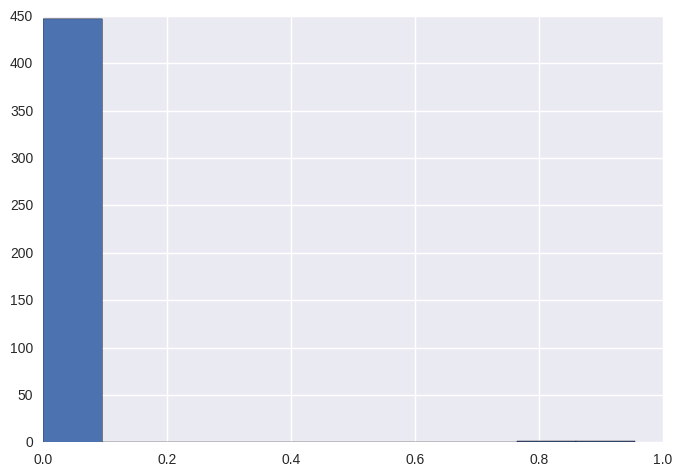

In [55]:
plt.hist(act0['predicted']);

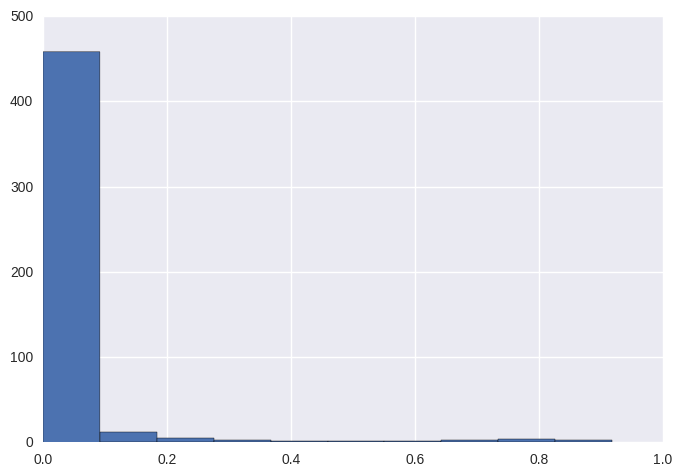

In [56]:
plt.hist(act1['predicted']);

In [74]:
X2 = feat[['perc_in_labor_frc',
      'perc_in_armfrc', 'p_com_workhome', 'perc_occ_mgt',
       'p_ind_edsvc', 'p_ind_pubadm', 
       'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 
       'p_highsch',  'p_civvet',  'p_civdis_1864',
       'p_civdis_65', 
       'p_nativestate', 'p_nat_citz', 'p_spk_engl']]
X2 = sm.add_constant(X2)
X2 = X2.fillna(0)

In [75]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,
                                                    random_state=42)

In [76]:
X2_train.describe()

,const,perc_in_labor_frc,perc_in_armfrc,p_com_workhome,perc_occ_mgt,p_ind_edsvc,p_ind_pubadm,ln_popdens,p_marrfam,p_malehh,p_femhh,avg_hh_size,fert_age15_19,p_highsch,p_civvet,p_civdis_1864,p_civdis_65,p_nativestate,p_nat_citz,p_spk_engl
count,2199.0,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,1.0,59.745703,0.315371,4.800091,30.965075,23.114825,5.780719,3.853112,51.704184,2.320964,6.331878,2.526817,26.099591,85.163302,10.192724,13.251523,39.179991,67.300136,41.988222,90.725739
std,0.0,7.778468,1.734125,3.377064,6.510276,4.731697,3.402499,1.640109,6.731549,0.973545,2.399101,0.255456,36.567146,6.726009,2.720833,4.694109,7.387002,14.560560,19.323653,11.422225
min,1.0,20.600000,0.000000,0.000000,10.400000,3.500000,1.000000,0.000000,23.200000,0.000000,0.000000,1.390000,0.000000,46.700000,0.000000,2.400000,10.700000,15.700000,0.000000,5.600000
25%,1.0,54.800000,0.000000,2.800000,26.600000,20.100000,3.600000,2.915061,48.300000,1.700000,4.800000,2.370000,2.500000,80.900000,8.600000,9.900000,34.100000,59.100000,28.400000,89.500000
50%,1.0,60.300000,0.000000,4.000000,29.800000,22.800000,4.800000,3.839452,52.100000,2.200000,6.100000,2.500000,16.000000,86.600000,10.000000,12.700000,38.400000,70.500000,41.000000,94.900000
75%,1.0,65.300000,0.100000,5.800000,34.300000,25.600000,6.800000,4.734882,55.900000,2.800000,7.500000,2.640000,35.000000,90.300000,11.500000,15.900000,43.200000,78.100000,54.300000,97.200000
max,1.0,85.700000,49.000000,35.500000,69.200000,47.500000,27.300000,11.148642,79.900000,9.800000,20.400000,4.680000,690.000000,98.700000,26.300000,34.500000,100.000000,96.600000,100.000000,100.000000


In [77]:
t2_log = sm.Logit(y_train,X2_train).fit()
print (t2_log.summary())

Optimization terminated successfully.
         Current function value: 0.340924
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                pov_bin   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2179
Method:                           MLE   Df Model:                           19
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                  0.5080
Time:                        16:19:45   Log-Likelihood:                -749.69
converged:                       True   LL-Null:                       -1523.7
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                24.3353      2.499      9.737      0.000        19.437    29.234
perc_in_